In [1]:
using LinearAlgebra
using Plots

# Problem 1)

Here we approximate the $\sin(x)$ function with a polynomial using the least squares method. 

In [2]:
function approx(x, deg, fstar)
    # matrix containing every point raised to the correct power. 
    # This is what will be used to solve for the coefficients in our least squares problem. 
    A = [i^p for i in x, p in 0:deg]

    # evaluate our target function over the range
    b = fstar.(x)

    # Solve the least-squares problem to find the coefficients
    c = (A'*A) \ (A'*b)

    # create function to evaluate polynomial on the sample points
    fapprox(c, x) = sum(c[p+1] * x^p for p in 0:deg)
    
    return [fapprox(c,i) for i in x]
end

approx (generic function with 1 method)

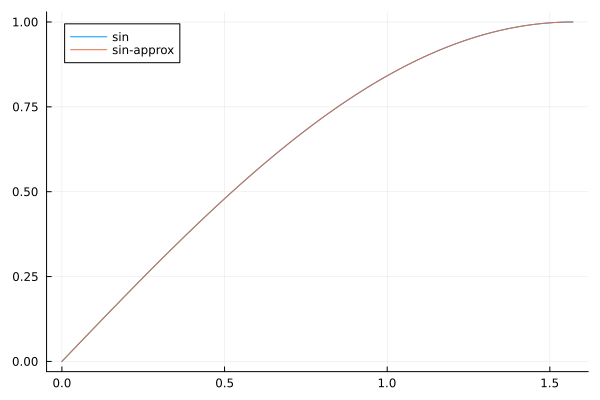

In [3]:
# Degree of polynomial we will approximate our function with.
deg = 10

# number of evaluation points
npoints = 1000

# Create range of points at which to evaluate our function
x = LinRange(0, π/2, npoints)

# target function
fstar(x) = sin(x)

# calculate the polynomial approximation of sin
asin = approx(x, deg, fstar)

# Plot our results
p = plot()
plot!(x, fstar.(x), label="sin")
plot!(x, asin , label="sin-approx")
p

In [4]:
savefig("sinapprox.pdf")

"/home/ccoughlin/Numerical Methods/Project-2--Linear/sinapprox.pdf"

# Problem 2) 

Here we quantify the error in our approximation E by calculating the root mean square of the difference between our approximation and the $\sin$ function.

In [5]:
function L2(f1,f2)
    # Calculate difference between functions
    diff = f1.-f2

    # Calculate the L2 norm of the difference
    return sqrt(1/length(diff)*sum(diff.^2))
end

L2 (generic function with 1 method)

In [6]:
E = L2(fstar.(x),asin)

3.223812199083237e-10

Lets explore how our error changes as a function of the degree of our polynomial!  

In [7]:
# Create a vector to choose the degree of the polynomial to approximate our function with 
degrees = Vector(1:20)

# Evaluate the accuracy of each of our approximations 
E = [L2(fstar.(x),approx(x, d, fstar)) for d in degrees]

20-element Vector{Float64}:
 0.06288874724519482
 0.008406504382774679
 0.000836386213032064
 6.63088968846264e-5
 4.37068195308846e-6
 2.465688208064027e-7
 1.2159061896626375e-8
 5.326181308044476e-10
 7.121103537354954e-11
 3.223812199083237e-10
 2.076197567240848e-9
 4.050293734562854e-9
 4.766915403116408e-10
 1.9043259905245672e-9
 3.517418071472849e-9
 5.312569948835048e-9
 5.864199458820038e-9
 2.9706804342505478e-9
 1.5182652852302624e-9
 2.4442507805009152e-9

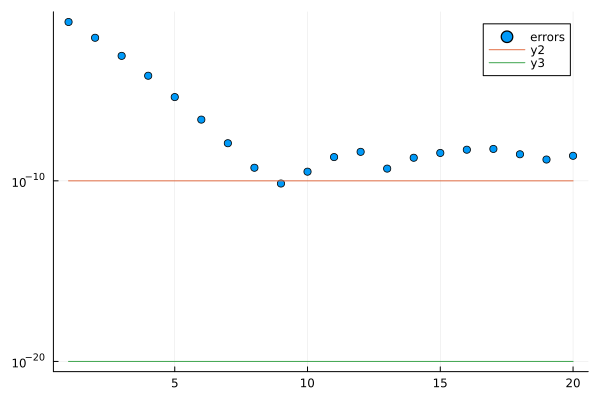

In [8]:
# Plot our results
p = plot()
scatter!(degrees, E, yaxis=:log, label="errors")
plot!(degrees, 1.0e-10 * degrees./degrees)
plot!(degrees, 1.0e-20 * degrees./degrees)
p

In [9]:
savefig("errorVsDeg.pdf")

"/home/ccoughlin/Numerical Methods/Project-2--Linear/errorVsDeg.pdf"

# Problem 3)

Since the function we are approximating is antisymmetric, then we can use only anitsymmetric polynomials to better approximate our function with less computational cost. 

In [10]:
# Define new function to appoximate using antisymmetric polynomials
function asym_approx(x, deg, fstar)
    # matrix containing every point raised to an odd power. 
    # This is what will be used to solve for the coefficients in our least squares problem. 
    A = [i^(2p+1) for i in x, p in 0:deg]

    # evaluate our target function over the range
    b = fstar.(x)

    # Solve the least-squares problem to find the coefficients
    c = (A'*A) \ (A'*b)

    # create function to evaluate polynomial on the sample points
    fapprox(c, x) = sum(c[p+1] * x^(2p+1) for p in 0:deg)
    
    return [fapprox(c,i) for i in x]
end

asym_approx (generic function with 1 method)

In [11]:
# Evaluate the accuracy of each of our approximations 
Easym = [L2(fstar.(x),asym_approx(x, d, fstar)) for d in degrees]

20-element Vector{Float64}:
 0.00277955311083991
 4.20510683647175e-5
 3.669678154031845e-7
 2.0842000577490022e-9
 8.320237729662965e-12
 1.3478801374942253e-12
 8.837010788565771e-12
 3.182494416420065e-11
 7.720214533237634e-11
 1.8380311976033416e-10
 2.273567124217827e-9
 1.4290415878860021e-9
 1.1194274956288771e-9
 7.046921652948254e-9
 4.395295361370304e-9
 1.8420065032194362e-8
 5.537885237808305e-9
 2.454302635494698e-8
 2.671189552629598e-8
 4.122899330500714e-9

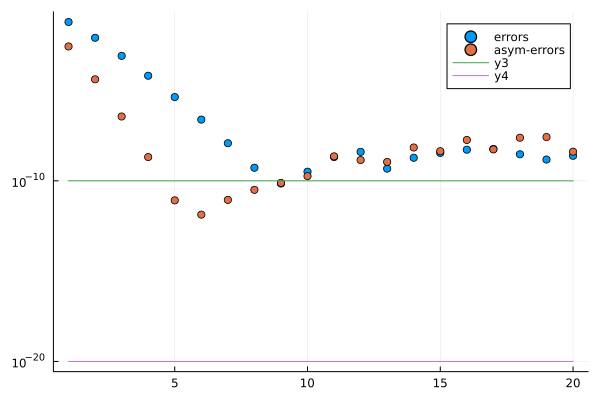

In [12]:
# Plot our results
p = plot()
scatter!(degrees, E, yaxis=:log, label="errors")
scatter!(degrees, Easym, yaxis=:log, label="asym-errors")
plot!(degrees, 1.0e-10 * degrees./degrees)
plot!(degrees, 1.0e-20 * degrees./degrees)
p

In [13]:
savefig("errorVsCost.pdf")

"/home/ccoughlin/Numerical Methods/Project-2--Linear/errorVsCost.pdf"

# Problem 4) 
## a)

We will manually take the derivative of our approximating polynomial

$$f(c,x) = \sum_p c_p x^p$$

which gives us 

$$f'(c,x) = \sum_p c_p  p x^{p-1}$$

Now we would like to define a new function 

$$g(c,x) = \sum_p d_p x^p$$

and solve for the coefficients of $|d>$ as a function of $|c>$. The relation can be expressed by a linear operator $D$ which is the derivative matrix.

$$|d> = D|c>$$

Examining what the derivative operator does to our polynomial, we can see that it decreases the degree of each power of $x$ by one and multiplies $c_p$ by the previous power $p$. To express this as a matrix we can see that a linear operation of the form 

$$D = \left[\begin{array}{llll}
0 & 1 & 0 & 0 \\
0 & 0 & 2 & 0 \\
0 & 0 & 0 & 3 \\
0 & 0 & 0 & 0
\end{array}\right]$$ 

Where what is shown is the derivative operator for a degree 3 polynomial, but this can be similarly extended to any degree polynomial. Lets numerically solve for the coefficients and see if this is what we get.

## b)

Here we manually calculate the derivative of our polynomial in terms of the coefficients we found previously, and we also numerically solve for the coefficients of our approximate derivative polynomial.

In [14]:
# First lets get the coefficients for our sin approximation
A = [i^p for i in x, p in 0:deg]
b = sin.(x)
c = (A'*A) \ (A'*b)

# next lets define our function for the derivative of sin in terms of the coefficients
g(c, x) = sum(c[p+2] * x^(p) * (p+1) for p in 0:deg-1)   
t = [g(c,i) for i in x]

# now lets solve for the coefficients of our derivative polynomial
D = [i^p for i in x, p in 0:deg-1]
d = (D'*D) \ (D'*t)

# lets define our new approximate function 
h(c, x) = sum(d[p+1] * x^(p) for p in 0:deg-1)  
y = [h(c,i) for i in x]

# lets see our derivative coefficients divided by our first approximation coefficients it is a fucntion of
d ./ c[2:deg+1]

10-element Vector{Float64}:
  1.000000000493672
  2.0153275528970376
  2.99999770222782
  4.042980260026678
  5.000807200526551
  6.07159675860972
  6.751520515065958
  8.097652844949499
  9.097551734287364
 10.1162761572712

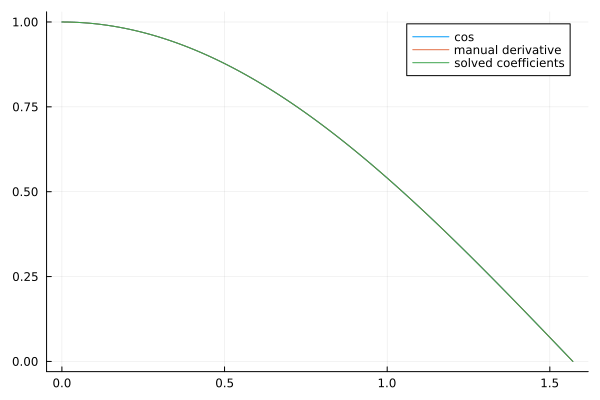

In [15]:
# Plot our results
p = plot()
plot!(x, cos.(x), label="cos")
plot!(x, y , label="manual derivative")
plot!(x, t , label="solved coefficients")
p

In [16]:
savefig("approxDeriv.pdf")

"/home/ccoughlin/Numerical Methods/Project-2--Linear/approxDeriv.pdf"